Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

In [96]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNetCV


from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore
from scipy import stats

In [97]:
dfTest=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")

dfTrain=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")          

In [98]:
dfTrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [99]:
dfTrain

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [100]:
dfTest

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


the target column is numerical column and it is a regression problem

In [101]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


there are missing values in item weight(numerical) and outlet size(categorical)

In [102]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


there are missing values in item weight(numerical) and outlet size(categorical)

In [103]:
dfTrain['Item_Weight'].mean()

12.857645184135976

In [104]:
dfTrain['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [105]:
dfTrain.groupby('Item_Type').mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Type,,,,,
Baking Goods,12.277108,0.069169,126.380766,1997.728395,1952.971207
Breads,11.346936,0.066255,140.952669,1997.657371,2204.132226
Breakfast,12.768202,0.085723,141.788151,1997.336364,2111.808651
Canned,12.305705,0.068129,139.763832,1998.152542,2225.194904
Dairy,13.426069,0.072427,148.499208,1997.681818,2232.542597
Frozen Foods,12.867061,0.065645,138.503366,1998.024533,2132.867744
Fruits and Vegetables,13.224769,0.068513,144.581235,1997.719968,2289.009592
Hard Drinks,11.400328,0.064943,137.077928,1998.177570,2139.221622
Health and Hygiene,13.142314,0.055216,130.818921,1997.734615,2010.000265


In [106]:
dfTrain['Item_Type']

0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegetables
4                   Household
                ...          
8518              Snack Foods
8519             Baking Goods
8520       Health and Hygiene
8521              Snack Foods
8522              Soft Drinks
Name: Item_Type, Length: 8523, dtype: object

In [107]:
dfTrain.groupby('Item_Type').mean()['Item_Weight']

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [108]:
dfTrain['Item_Weight']=dfTrain.groupby('Item_Type')['Item_Weight'].transform(lambda val: val.fillna(val.mean()))

In [109]:
dfTest['Item_Weight']=dfTest.groupby('Item_Type')['Item_Weight'].transform(lambda val: val.fillna(val.mean()))

In [110]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [111]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [112]:
dfTest['Outlet_Size']

0       Medium
1          NaN
2          NaN
3          NaN
4       Medium
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 5681, dtype: object

In [113]:
dfTest.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           352
Supermarket Type1  Small          1240
                   High            621
                   Medium          620
Supermarket Type2  Medium          618
Supermarket Type3  Medium          624
Name: Outlet_Size, dtype: int64

In [114]:
dfTest[dfTest['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5668,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store
5670,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [115]:
dfTest.groupby('Outlet_Type')['Outlet_Size'].transform(lambda val: val.fillna(val.mode()))

0       Medium
1          NaN
2          NaN
3          NaN
4       Medium
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 5681, dtype: object

In [116]:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode_Test = dfTest.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print('Mode for each Outlet_Type:')
outlet_size_mode_Test


Mode for each Outlet_Type:


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [117]:
outlet_size_mode_Test['Supermarket Type1']

Outlet_Size    Small
Name: Supermarket Type1, dtype: object

In [118]:
miss_boolTest = dfTest['Outlet_Size'].isnull() 

In [119]:
miss_boolTest

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [120]:
dfTest.loc[miss_boolTest,'Outlet_Type']

1       Supermarket Type1
2           Grocery Store
3       Supermarket Type1
8       Supermarket Type1
9       Supermarket Type1
              ...        
5668        Grocery Store
5670    Supermarket Type1
5678    Supermarket Type1
5679    Supermarket Type1
5680    Supermarket Type1
Name: Outlet_Type, Length: 1606, dtype: object

In [121]:
dfTest.loc[miss_boolTest,'Outlet_Type'].apply(lambda x: outlet_size_mode_Test[x])


,Outlet_Size
1,Small
2,Small
3,Small
8,Small
9,Small
...,...
5668,Small
5670,Small
5678,Small
5679,Small


In [122]:
dfTest.loc[miss_boolTest,'Outlet_Size']=dfTest.loc[miss_boolTest,'Outlet_Type'].apply(lambda x: outlet_size_mode_Test[x])


In [123]:
dfTest

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.60000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.31500,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.95504,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.60000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.00000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1
5679,FDJ26,15.30000,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1


In [124]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [125]:
outlet_size_mode_Train = dfTrain.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print('Mode for each Outlet_Type:')
outlet_size_mode_Train


Mode for each Outlet_Type:


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [126]:
miss_boolTrain = dfTrain['Outlet_Size'].isnull() 

In [127]:
dfTrain.loc[miss_boolTrain,'Outlet_Size']=dfTrain.loc[miss_boolTrain,'Outlet_Type'].apply(lambda x: outlet_size_mode_Test[x])


In [128]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Now there is no any missing data

In [129]:
dfTrain.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [130]:
dfTrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [131]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


from dfTrain.describe() --
Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.

In [132]:
visibility_avg = dfTrain.pivot_table(values='Item_Visibility', index='Item_Identifier')
visibility_avg

,Item_Visibility
Item_Identifier,
DRA12,0.031956
DRA24,0.048062
DRA59,0.134718
DRB01,0.082126
DRB13,0.008002
...,...
NCZ30,0.024956
NCZ41,0.051623
NCZ42,0.009044


In [133]:
visibility_avg.loc['DRA12']

Item_Visibility    0.031956
Name: DRA12, dtype: float64

In [134]:
#Determine average visibility of a product
visibility_avg = dfTrain.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (dfTrain['Item_Visibility'] == 0)

print('Number of 0 values initially: %d'%sum(miss_bool))
dfTrain.loc[miss_bool,'Item_Visibility'] = dfTrain.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
print('Number of 0 values after modification: %d'%sum(dfTrain['Item_Visibility'] == 0))

Number of 0 values initially: 526
Number of 0 values after modification: 0


In [135]:
visibility_avg.loc['FDX07']

Item_Visibility    0.015274
Name: FDX07, dtype: float64

In [136]:
visibility_avg.loc['NCD19']

Item_Visibility    0.008082
Name: NCD19, dtype: float64

In [137]:
dfTrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [138]:

#Impute 0 values with mean visibility of that product:
miss_bool = (dfTest['Item_Visibility'] == 0)

print('Number of 0 values initially: %d'%sum(miss_bool))
dfTest.loc[miss_bool,'Item_Visibility'] = dfTest.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
print('Number of 0 values after modification: %d'%sum(dfTest['Item_Visibility'] == 0))

Number of 0 values initially: 353
Number of 0 values after modification: 0


 Determine the years of operation of a store
making a new column depicting the years of operation of a store

In [139]:
dfTrain['Outlet_Years'] = 2013 - dfTrain['Outlet_Establishment_Year']
dfTrain['Outlet_Years'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

In [140]:
dfTest['Outlet_Years'] = 2013 - dfTest['Outlet_Establishment_Year']
dfTest['Outlet_Years'].describe()

count    5681.000000
mean       15.171097
std         8.372256
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

In [141]:
dfTrain['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [142]:
dfTest['Item_Fat_Content'].value_counts()


Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [143]:
dfTrain['Item_Fat_Content'] = dfTrain['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [144]:
dfTest['Item_Fat_Content'] = dfTest['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

## checking for outliers

In [145]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Outlet_Years               8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [146]:
zScores=np.abs(zscore(dfTrain.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1)))
zScores

array([[0.84060081, 1.07660592, 1.74745381, 0.13954076, 0.910601  ,
        0.13954076],
       [1.63917263, 1.01173738, 1.48902325, 1.33410274, 1.01844035,
        1.33410274],
       [1.0967628 , 1.06229523, 0.01004021, 0.13954076, 0.04923754,
        0.13954076],
       ...,
       [0.53345779, 0.69234419, 0.89720755, 0.73682175, 0.57909963,
        0.73682175],
       [1.33439226, 1.5168656 , 0.60797692, 1.33410274, 0.19672492,
        1.33410274],
       [0.45885039, 0.49775335, 1.05226104, 0.09937163, 0.82959407,
        0.09937163]])

In [147]:
filteredEntries=(zScores<3).all(axis=1)
filteredEntries

array([ True,  True,  True, ...,  True,  True,  True])

In [148]:
np.sum(filteredEntries)

8336

In [149]:
(8523 -8336)/8523 

0.021940631233133872

only 2% data is outliers so removing them

In [150]:
dfTrain=dfTrain[filteredEntries]


## EDA

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

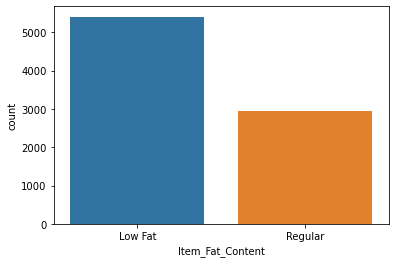

In [151]:
sns.countplot(dfTrain['Item_Fat_Content'])

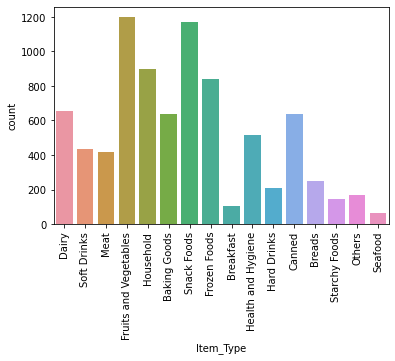

In [152]:
sns.countplot(dfTrain['Item_Type'])
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

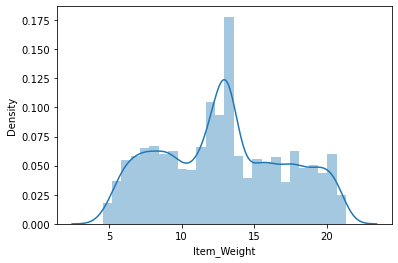

In [153]:
sns.distplot(dfTrain['Item_Weight'])

there is skewness here

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

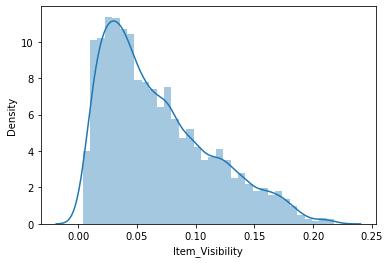

In [154]:
sns.distplot(dfTrain['Item_Visibility'])

there is skewness here 

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

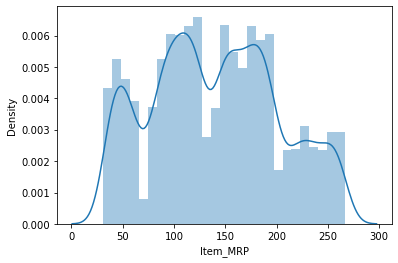

In [155]:
sns.distplot(dfTrain['Item_MRP'])

Item_MRP has skewness

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

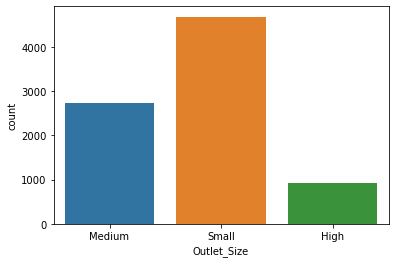

In [156]:
sns.countplot(dfTrain['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

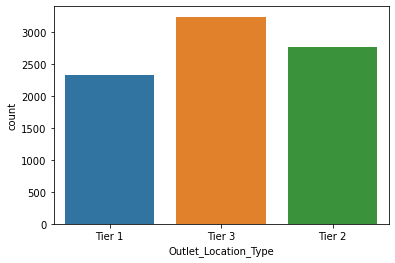

In [157]:
sns.countplot(dfTrain['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

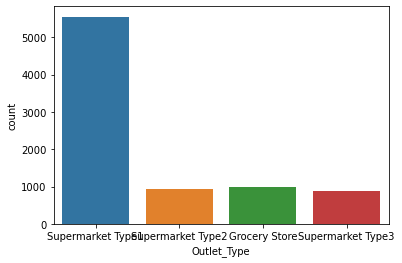

In [158]:
sns.countplot(dfTrain['Outlet_Type'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

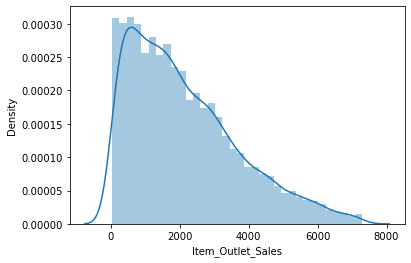

In [159]:
sns.distplot(dfTrain['Item_Outlet_Sales'])

Item_Outlet_Sales  is  skewed

<AxesSubplot:xlabel='Outlet_Years', ylabel='Density'>

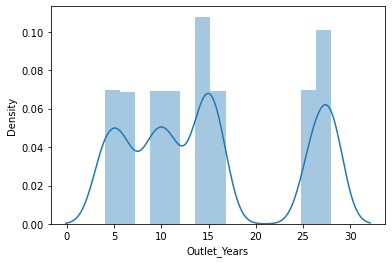

In [160]:
sns.distplot(dfTrain['Outlet_Years'])

Outlet_Years is skewed

## removing skewness

In [161]:
dfTrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Years'],
      dtype='object')

In [162]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8336 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8336 non-null   object 
 1   Item_Weight                8336 non-null   float64
 2   Item_Fat_Content           8336 non-null   object 
 3   Item_Visibility            8336 non-null   float64
 4   Item_Type                  8336 non-null   object 
 5   Item_MRP                   8336 non-null   float64
 6   Outlet_Identifier          8336 non-null   object 
 7   Outlet_Establishment_Year  8336 non-null   int64  
 8   Outlet_Size                8336 non-null   object 
 9   Outlet_Location_Type       8336 non-null   object 
 10  Outlet_Type                8336 non-null   object 
 11  Item_Outlet_Sales          8336 non-null   float64
 12  Outlet_Years               8336 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [163]:
dfTrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [164]:
dfTrain['Item_Identifier'].apply(lambda x: x[0:2])

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Identifier, Length: 8336, dtype: object

In [165]:
#Get the first two characters of ID:
dfTrain['Item_Type_Combined'] = dfTrain['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
dfTrain['Item_Type_Combined'] = dfTrain['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
dfTrain['Item_Type_Combined'].value_counts()

Food              5973
Non-Consumable    1580
Drinks             783
Name: Item_Type_Combined, dtype: int64

In [166]:
#Get the first two characters of ID:
dfTest['Item_Type_Combined'] = dfTest['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
dfTest['Item_Type_Combined'] = dfTest['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
dfTest['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

In [167]:
numericCols=['Item_Weight', 'Item_Visibility','Item_MRP', 'Outlet_Years']

In [168]:
for column in numericCols:
    print(column , dfTrain[column].skew())

Item_Weight 0.08861304626286466
Item_Visibility 0.8387470958542677
Item_MRP 0.13883305965053466
Outlet_Years 0.4236184883411655


only item visibility has more skew than 0.5

In [169]:
moreSkew=['Item_Visibility']

In [170]:
def min_skewness(colu):
    min_Skew=np.abs(dfTrain[colu].skew())
    print("initial",min_Skew)
    
    box_col_Skew=10
    min_SkewType=""
    log_col=np.log(dfTrain[colu])
    sqrt_col=np.sqrt(dfTrain[colu])
    try:
        box_col=stats.boxcox(dfTrain[colu])[0]
        box_col_Skew=np.abs(pd.Series(box_col).skew())
        print(box_col_Skew)

    except ValueError:
        print("hi")
    
    log_col_Skew=np.abs(log_col.skew())
    sqrt_col_Skew=np.abs(sqrt_col.skew())
    
    print(log_col_Skew)
    print(sqrt_col_Skew)
    
    if log_col_Skew<min_Skew:
        min_SkewType="log"
        min_Skew=log_col_Skew
    if sqrt_col_Skew<min_Skew:
        min_SkewType="sqrt"
        min_Skew=sqrt_col_Skew
    if box_col_Skew<min_Skew:
        min_SkewType="box"
        min_Skew=box_col_Skew
    print(min_Skew)
    print(column,"=",min_SkewType)
        



In [171]:
for column in moreSkew:
    print(column)
    min_skewness(column)
    print("="*20)

Item_Visibility
initial 0.8387470958542677
0.05467486679345329
0.4918927246210868
0.24646404762349475
0.05467486679345329
Item_Visibility = box


based on the above output apply the Boxcox transformation as below as they give minimum skew.

In [172]:
dfTrain['Item_Visibility']= stats.boxcox(dfTrain['Item_Visibility'])[0]

In [173]:
dfTest['Item_Visibility']= stats.boxcox(dfTest['Item_Visibility'])[0]

In [174]:
for column in numericCols:
    print(column , dfTrain[column].skew())

Item_Weight 0.08861304626286466
Item_Visibility -0.05467486679345329
Item_MRP 0.13883305965053466
Outlet_Years 0.4236184883411655


Now all features are having very less skew(between -0.5 and +0.5)

In [175]:
dfTrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined
0,FDA15,9.30,Low Fat,-2.451035,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food
1,DRC01,5.92,Regular,-2.391704,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,FDN15,17.50,Low Fat,-2.437252,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food
3,FDX07,19.20,Regular,-2.466504,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,Food
4,NCD19,8.93,Low Fat,-2.647791,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

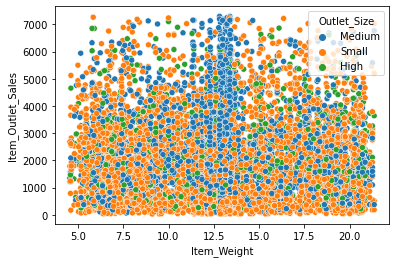

In [176]:
sns.scatterplot(data=dfTrain,x='Item_Weight',y='Item_Outlet_Sales',hue='Outlet_Size')

<AxesSubplot:xlabel='Outlet_Years', ylabel='Item_Outlet_Sales'>

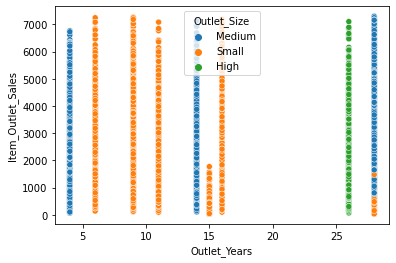

In [177]:
sns.scatterplot(data=dfTrain,x='Outlet_Years',y='Item_Outlet_Sales',hue='Outlet_Size')

In [178]:
dfTrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined
0,FDA15,9.30,Low Fat,-2.451035,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food
1,DRC01,5.92,Regular,-2.391704,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,FDN15,17.50,Low Fat,-2.437252,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food
3,FDX07,19.20,Regular,-2.466504,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,Food
4,NCD19,8.93,Low Fat,-2.647791,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable


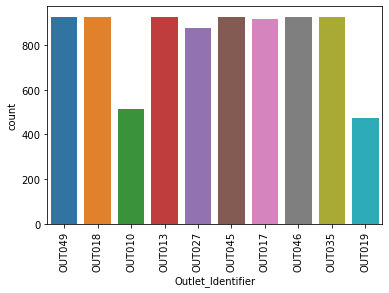

In [179]:
sns.countplot(dfTrain['Outlet_Identifier'])
plt.xticks(rotation=90);

In [180]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [181]:
dfTrain['Outlet'] = le.fit_transform(dfTrain['Outlet_Identifier'])
dfTest['Outlet'] = le.transform(dfTest['Outlet_Identifier'])

encoding the categorical columns

In [182]:
categoricalCols=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet']

In [183]:
var_mod = categoricalCols 
le = LabelEncoder()
for i in var_mod:
    dfTrain[i] = le.fit_transform(dfTrain[i])
    dfTest[i] = le.transform(dfTest[i])
    

In [184]:
dfTrain

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined,Outlet
0,FDA15,9.300,0,-2.451035,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,14,1,9
1,DRC01,5.920,1,-2.391704,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,4,0,3
2,FDN15,17.500,0,-2.437252,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,14,1,9
3,FDX07,19.200,1,-2.466504,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,15,1,0
4,NCD19,8.930,0,-2.647791,Household,53.8614,OUT013,1987,0,2,1,994.7052,26,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,-1.973301,Snack Foods,214.5218,OUT013,1987,0,2,1,2778.3834,26,1,1
8519,FDS36,8.380,1,-2.056105,Baking Goods,108.1570,OUT045,2002,2,1,1,549.2850,11,1,7
8520,NCJ29,10.600,0,-2.174305,Health and Hygiene,85.1224,OUT035,2004,2,1,1,1193.1136,9,2,6
8521,FDN46,7.210,1,-1.491537,Snack Foods,103.1332,OUT018,2009,1,2,2,1845.5976,4,1,3


In [185]:
dfTest

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Type_Combined,Outlet
0,FDW58,20.75000,0,-2.953654,Snack Foods,107.8622,OUT049,1999,1,0,1,14,1,9
1,FDW14,8.30000,1,-2.304146,Dairy,87.3198,OUT017,2007,2,1,1,6,1,2
2,NCN55,14.60000,0,-1.796453,Others,241.7538,OUT010,1998,2,2,0,15,2,0
3,FDQ58,7.31500,0,-2.698998,Snack Foods,155.0340,OUT017,2007,2,1,1,6,1,2
4,FDY38,12.95504,1,-1.690723,Dairy,234.2300,OUT027,1985,1,2,3,28,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50000,1,-2.749181,Snack Foods,141.3154,OUT046,1997,2,0,1,16,1,8
5677,FDD47,7.60000,1,-1.572886,Starchy Foods,169.1448,OUT018,2009,1,2,2,4,1,3
5678,NCO17,10.00000,0,-1.970179,Health and Hygiene,118.7440,OUT045,2002,2,1,1,11,2,7
5679,FDJ26,15.30000,1,-1.890069,Canned,214.6218,OUT017,2007,2,1,1,6,1,2


In [186]:
#One Hot Coding:
dfTrain = pd.get_dummies(dfTrain, columns=categoricalCols,drop_first=True)

In [187]:
dfTest = pd.get_dummies(dfTest, columns=categoricalCols,drop_first=True)

In [188]:
dfTrain

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.300,-2.451035,Dairy,249.8092,OUT049,1999,3735.1380,14,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.920,-2.391704,Soft Drinks,48.2692,OUT018,2009,443.4228,4,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.500,-2.437252,Meat,141.6180,OUT049,1999,2097.2700,14,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.200,-2.466504,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,15,1,...,0,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,-2.647791,Household,53.8614,OUT013,1987,994.7052,26,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,-1.973301,Snack Foods,214.5218,OUT013,1987,2778.3834,26,0,...,0,1,0,0,0,0,0,0,0,0
8519,FDS36,8.380,-2.056105,Baking Goods,108.1570,OUT045,2002,549.2850,11,1,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,-2.174305,Health and Hygiene,85.1224,OUT035,2004,1193.1136,9,0,...,1,0,0,0,0,0,1,0,0,0
8521,FDN46,7.210,-1.491537,Snack Foods,103.1332,OUT018,2009,1845.5976,4,1,...,0,0,0,1,0,0,0,0,0,0


In [189]:
dfTest

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_1,Outlet_Location_Type_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,20.75000,-2.953654,Snack Foods,107.8622,OUT049,1999,14,0,0,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.30000,-2.304146,Dairy,87.3198,OUT017,2007,6,1,1,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.60000,-1.796453,Others,241.7538,OUT010,1998,15,0,0,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.31500,-2.698998,Snack Foods,155.0340,OUT017,2007,6,0,1,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,12.95504,-1.690723,Dairy,234.2300,OUT027,1985,28,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50000,-2.749181,Snack Foods,141.3154,OUT046,1997,16,1,0,...,0,0,0,0,0,0,0,0,1,0
5677,FDD47,7.60000,-1.572886,Starchy Foods,169.1448,OUT018,2009,4,1,0,...,0,0,0,1,0,0,0,0,0,0
5678,NCO17,10.00000,-1.970179,Health and Hygiene,118.7440,OUT045,2002,11,0,1,...,1,0,0,0,0,0,0,1,0,0
5679,FDJ26,15.30000,-1.890069,Canned,214.6218,OUT017,2007,6,1,1,...,0,0,1,0,0,0,0,0,0,0


In [192]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

In [193]:
dfTrain.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

dfTest.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)


In [194]:
predictors  = [i for i in dfTrain.columns if i not in [target]+IDcol]


In [195]:
y=dfTrain['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8336, dtype: float64

In [196]:
X=dfTrain[predictors]
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_1,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.300,-2.451035,249.8092,14,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.920,-2.391704,48.2692,4,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,-2.437252,141.6180,14,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.200,-2.466504,182.0950,15,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,8.930,-2.647791,53.8614,26,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,-1.973301,214.5218,26,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,-2.056105,108.1570,11,1,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,-2.174305,85.1224,9,0,1,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
8521,7.210,-1.491537,103.1332,4,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## identifying the best random state

In [197]:
minRMSE="null"
minRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_test,pred))
    if(minRMSE=="null" or RMSE<minRMSE):
        minRMSE=RMSE
        minRS=i
        
print("min RMSE is",minRMSE,"on random state",minRS)

min RMSE is 1010.4819434079644 on random state 109


min RMSE is 1010.4819434079644 on random state 109


In [198]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=109)


## Scaling

In [199]:
from sklearn.preprocessing import StandardScaler

In [200]:
scaler = StandardScaler()

In [201]:
X.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Years',
       'Item_Fat_Content_1', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_1', 'Outlet_Size_2',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_1', 'Outlet_2',
       'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Outlet_9'],
      dtype='object')

In [202]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8336 entries, 0 to 8522
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Weight             8336 non-null   float64
 1   Item_Visibility         8336 non-null   float64
 2   Item_MRP                8336 non-null   float64
 3   Outlet_Years            8336 non-null   int64  
 4   Item_Fat_Content_1      8336 non-null   uint8  
 5   Outlet_Location_Type_1  8336 non-null   uint8  
 6   Outlet_Location_Type_2  8336 non-null   uint8  
 7   Outlet_Size_1           8336 non-null   uint8  
 8   Outlet_Size_2           8336 non-null   uint8  
 9   Outlet_Type_1           8336 non-null   uint8  
 10  Outlet_Type_2           8336 non-null   uint8  
 11  Outlet_Type_3           8336 non-null   uint8  
 12  Item_Type_Combined_1    8336 non-null   uint8  
 13  Item_Type_Combined_2    8336 non-null   uint8  
 14  Outlet_1                8336 non-null   

In [203]:
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_1,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.300,-2.451035,249.8092,14,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.920,-2.391704,48.2692,4,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,-2.437252,141.6180,14,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.200,-2.466504,182.0950,15,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,8.930,-2.647791,53.8614,26,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,-1.973301,214.5218,26,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,-2.056105,108.1570,11,1,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,-2.174305,85.1224,9,0,1,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
8521,7.210,-1.491537,103.1332,4,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [204]:

scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train)


In [205]:
X_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Years',
       'Item_Fat_Content_1', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_1', 'Outlet_Size_2',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_1', 'Outlet_2',
       'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Outlet_9'],
      dtype='object')

In [206]:
XtrainDF=pd.DataFrame(X_train_scale,columns=X_train.columns)
XtrainDF

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_1,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0.743827,0.825291,1.182387,-0.125413,-0.744879,-0.702933,-0.810115,1.422611,-1.118935,0.713193,...,2.062522,-0.357529,-0.351449,-0.355935,-0.239509,-0.351449,-0.355935,-0.348548,-0.352413,2.869043
1,-0.781512,-1.123799,0.872167,-0.484058,1.342501,1.422611,-0.810115,-0.702933,0.893707,0.713193,...,-0.484843,-0.357529,-0.351449,-0.355935,-0.239509,-0.351449,-0.355935,2.869043,-0.352413,-0.348548
2,0.130110,0.557549,0.622336,1.548261,-0.744879,-0.702933,-0.810115,-0.702933,0.893707,-1.402145,...,2.062522,-0.357529,-0.351449,-0.355935,4.175206,-0.351449,-0.355935,-0.348548,-0.352413,-0.348548
3,-0.546844,-1.949467,1.571017,-0.005865,-0.744879,-0.702933,1.234392,-0.702933,0.893707,-1.402145,...,2.062522,-0.357529,-0.351449,-0.355935,-0.239509,-0.351449,-0.355935,-0.348548,-0.352413,-0.348548
4,0.673427,-0.297961,0.614318,1.309165,-0.744879,-0.702933,1.234392,-0.702933,-1.118935,0.713193,...,-0.484843,2.796974,-0.351449,-0.355935,-0.239509,-0.351449,-0.355935,-0.348548,-0.352413,-0.348548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5580,1.588630,-0.408962,-0.827569,-0.125413,-0.744879,-0.702933,-0.810115,1.422611,-1.118935,0.713193,...,2.062522,-0.357529,-0.351449,-0.355935,-0.239509,-0.351449,-0.355935,-0.348548,-0.352413,2.869043
5581,1.447830,0.206464,0.790000,-0.125413,1.342501,-0.702933,-0.810115,1.422611,-1.118935,0.713193,...,-0.484843,-0.357529,-0.351449,-0.355935,-0.239509,-0.351449,-0.355935,-0.348548,-0.352413,2.869043
5582,0.743827,0.097983,1.386851,-0.723154,-0.744879,1.422611,-0.810115,-0.702933,0.893707,0.713193,...,-0.484843,-0.357529,-0.351449,-0.355935,-0.239509,-0.351449,2.809504,-0.348548,-0.352413,-0.348548
5583,-1.250847,-0.144845,-0.283048,-0.125413,-0.744879,-0.702933,-0.810115,1.422611,-1.118935,0.713193,...,-0.484843,-0.357529,-0.351449,-0.355935,-0.239509,-0.351449,-0.355935,-0.348548,-0.352413,2.869043


In [207]:
x_val_scale=scaler.transform(X_val)
x_val_scale

array([[ 1.47129661,  1.83541366,  0.51451161, ..., -0.34854834,
        -0.35241289, -0.34854834],
       [-0.05404237,  0.14279809, -0.56541622, ...,  2.86904252,
        -0.35241289, -0.34854834],
       [-1.66620835, -0.28957966, -0.88310583, ...,  2.86904252,
        -0.35241289, -0.34854834],
       ...,
       [ 0.00862824,  1.72228129, -0.1922735 , ..., -0.34854834,
        -0.35241289, -0.34854834],
       [-1.032606  , -1.36764946,  0.89672761, ...,  2.86904252,
        -0.35241289, -0.34854834],
       [ 0.19235854, -0.95148937, -0.97383855, ...,  2.86904252,
        -0.35241289, -0.34854834]])

In [208]:
XvalDF=pd.DataFrame(x_val_scale,columns=X_train.columns)
XvalDF

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_1,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,1.471297,1.835414,0.514512,-1.081798,-0.744879,1.422611,-0.810115,-0.702933,0.893707,0.713193,...,2.062522,-0.357529,2.845363,-0.355935,-0.239509,-0.351449,-0.355935,-0.348548,-0.352413,-0.348548
1,-0.054042,0.142798,-0.565416,-0.484058,1.342501,1.422611,-0.810115,-0.702933,0.893707,0.713193,...,-0.484843,-0.357529,-0.351449,-0.355935,-0.239509,-0.351449,-0.355935,2.869043,-0.352413,-0.348548
2,-1.666208,-0.289580,-0.883106,-0.484058,-0.744879,1.422611,-0.810115,-0.702933,0.893707,0.713193,...,-0.484843,-0.357529,-0.351449,-0.355935,-0.239509,-0.351449,-0.355935,2.869043,-0.352413,-0.348548
3,1.353963,1.765970,-1.467634,-0.125413,1.342501,-0.702933,-0.810115,1.422611,-1.118935,0.713193,...,-0.484843,-0.357529,-0.351449,-0.355935,-0.239509,-0.351449,-0.355935,-0.348548,-0.352413,2.869043
4,-1.941943,-0.631852,-0.465103,-0.125413,1.342501,-0.702933,-0.810115,1.422611,-1.118935,0.713193,...,-0.484843,-0.357529,-0.351449,-0.355935,-0.239509,-0.351449,-0.355935,-0.348548,-0.352413,2.869043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,0.008628,-0.942230,-0.983460,1.548261,-0.744879,-0.702933,1.234392,1.422611,-1.118935,-1.402145,...,-0.484843,-0.357529,-0.351449,-0.355935,-0.239509,2.845363,-0.355935,-0.348548,-0.352413,-0.348548
2747,0.192359,0.442896,-1.373736,-0.484058,-0.744879,1.422611,-0.810115,-0.702933,0.893707,0.713193,...,2.062522,-0.357529,-0.351449,-0.355935,-0.239509,-0.351449,-0.355935,2.869043,-0.352413,-0.348548
2748,0.008628,1.722281,-0.192274,1.548261,-0.744879,-0.702933,-0.810115,-0.702933,0.893707,-1.402145,...,-0.484843,-0.357529,-0.351449,-0.355935,4.175206,-0.351449,-0.355935,-0.348548,-0.352413,-0.348548
2749,-1.032606,-1.367649,0.896728,-0.484058,-0.744879,1.422611,-0.810115,-0.702933,0.893707,0.713193,...,-0.484843,-0.357529,-0.351449,-0.355935,-0.239509,-0.351449,-0.355935,2.869043,-0.352413,-0.348548


In [209]:
lr=LinearRegression()
lr.fit(XtrainDF,y_train)
pred=lr.predict(XvalDF)

lrR2=r2_score(y_val, pred)
lrR2

0.5720085665938144

In [210]:
lrRMSE=np.sqrt(mean_squared_error(y_val, pred))
lrRMSE

1010.4819434079643

<AxesSubplot:title={'center':'Model Coefficients'}>

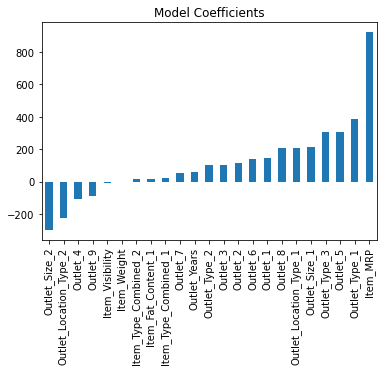

In [211]:
coef1 = pd.Series(lr.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [212]:
svr=SVR()
svr.fit(XtrainDF,y_train)
pred=svr.predict(XvalDF)
svrR2=r2_score(y_val, pred)
svrR2

0.036516289606461916

In [213]:
svrRMSE=np.sqrt(mean_squared_error(y_test,pred))
svrRMSE

1603.6299120491076

In [220]:
sgd=SGDRegressor()
sgd.fit(XtrainDF,y_train)
pred=sgd.predict(XvalDF)
sgdR2=r2_score(y_val, pred)
sgdR2

0.5711807590046782

<AxesSubplot:title={'center':'Model Coefficients'}>

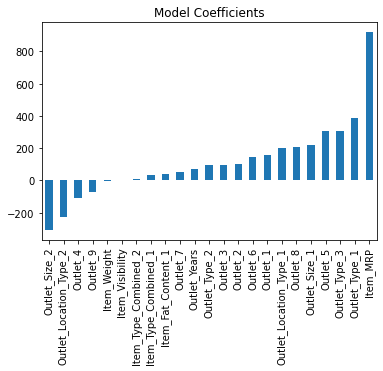

In [221]:
coef1 = pd.Series(sgd.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [222]:
sgdRMSE=np.sqrt(mean_squared_error(y_val,pred))
sgdRMSE

1011.4586925567766

In [223]:
knnR=KNeighborsRegressor()
knnR.fit(XtrainDF,y_train)
pred=knnR.predict(XvalDF)
knnR2=r2_score(y_val, pred)
knnR2

0.5088752379466344

In [224]:
knnrRMSE=np.sqrt(mean_squared_error(y_val,pred))
knnrRMSE

1082.4477322563826

## frinding cross val score for each model

In [225]:
from sklearn.pipeline import Pipeline


In [228]:
operations = [('scaler',StandardScaler()),('lr',lr)]
pipe=Pipeline(operations)
lrCV=cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()
lrCV

0.5553251696874908

In [229]:

operations = [('scaler',StandardScaler()),('svr',svr)]
pipe=Pipeline(operations)

svrCV=cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()
svrCV

0.03603551106943113

In [230]:
operations = [('scaler',StandardScaler()),('sgd',sgd)]
pipe=Pipeline(operations)

sgdCV=cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()
sgdCV

0.5534134604350459

In [231]:
operations = [('scaler',StandardScaler()),('knnr',knnR)]
pipe=Pipeline(operations)

knnrCV=cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()
knnrCV

0.5022664912271171

In [232]:
def rmseValue(model,indepen,depend):
    y_pred=model.predict(indepen)
    return np.sqrt(mean_squared_error(y_pred,depend))

operations = [('scaler',StandardScaler()),('lr',lr)]
pipe=Pipeline(operations)
lrCV1=cross_val_score(pipe,X,y,cv=5,scoring=rmseValue).mean()

operations = [('scaler',StandardScaler()),('svr',svr)]
pipe=Pipeline(operations)
svrCV1=cross_val_score(pipe,X,y,cv=5,scoring=rmseValue).mean()

operations = [('scaler',StandardScaler()),('SGD',sgd)]
pipe=Pipeline(operations)
sgdCV1=cross_val_score(pipe,X,y,cv=5,scoring=rmseValue).mean()

operations = [('scaler',StandardScaler()),('knnr',knnR)]
pipe=Pipeline(operations)
knnrCV1=cross_val_score(pipe,X,y,cv=5,scoring=rmseValue).mean()


### Comparing r2 scores for normal model and cross val score

In [235]:
print(lrR2-lrCV)
print(svrR2-svrCV)
print(sgdR2-sgdCV)
print(knnR2-knnrCV)

0.01668339690632359
0.00048077853703078904
0.017767298569632328
0.006608746719517278


Support Vector Regressor is the best method, as the difference between r2Score for cross val score and normal model r2Score is less (0.00048077853703078904)

## Hyper Parameter Tuning using a pipeline

In [237]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline



In [238]:

scaler=StandardScaler()

In [240]:
operations = [('scaler',scaler),('svr',SVR())]

In [241]:
pipe = Pipeline(operations)

In [242]:
param_grid = {'svr__C':[0.01,0.1,0.5,1],
             'svr__kernel':['linear','rbf','poly'],
              'svr__gamma':['scale','auto'],
              'svr__degree':[2,3],
              'svr__epsilon':[0,0.01,0.1,0.5,1,2]}

In [243]:
grid = GridSearchCV(pipe,param_grid,cv=5,scoring='neg_mean_squared_error',verbose=10)

In [244]:
grid.fit(X,y)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear
[CV 1/5; 1/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear;, score=-2703862.467 total time=   1.9s
[CV 2/5; 1/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear
[CV 2/5; 1/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear;, score=-2442022.357 total time=   1.7s
[CV 3/5; 1/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear
[CV 3/5; 1/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear;, score=-2438591.542 total time=   1.8s
[CV 4/5; 1/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear
[CV 4/5; 1/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear;

[CV 5/5; 7/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=linear;, score=-2462504.715 total time=   2.2s
[CV 1/5; 8/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf
[CV 1/5; 8/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf;, score=-2814242.450 total time=   3.9s
[CV 2/5; 8/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf
[CV 2/5; 8/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf;, score=-2541002.127 total time=   4.0s
[CV 3/5; 8/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf
[CV 3/5; 8/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf;, score=-2542228.114 total time=   3.9s
[CV 4/5; 8/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf
[CV 4/5; 8/288] END s

[CV 4/5; 14/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf;, score=-2585242.952 total time=   3.8s
[CV 5/5; 14/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf
[CV 5/5; 14/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf;, score=-2571756.270 total time=   3.8s
[CV 1/5; 15/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly
[CV 1/5; 15/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly;, score=-2813450.925 total time=   2.2s
[CV 2/5; 15/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly
[CV 2/5; 15/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly;, score=-2541166.090 total time=   2.2s
[CV 3/5; 15/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly
[CV 3/5; 15/288] EN

[CV 3/5; 21/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly;, score=-2541667.630 total time=   2.1s
[CV 4/5; 21/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly
[CV 4/5; 21/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly;, score=-2584862.298 total time=   2.1s
[CV 5/5; 21/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly
[CV 5/5; 21/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly;, score=-2571000.528 total time=   2.1s
[CV 1/5; 22/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear
[CV 1/5; 22/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear;, score=-2703810.833 total time=   2.2s
[CV 2/5; 22/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear
[CV 2/5; 22/2

[CV 2/5; 28/288] END svr__C=0.01, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=linear;, score=-2441709.713 total time=   1.9s
[CV 3/5; 28/288] START svr__C=0.01, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=linear
[CV 3/5; 28/288] END svr__C=0.01, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=linear;, score=-2438924.379 total time=   1.9s
[CV 4/5; 28/288] START svr__C=0.01, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=linear
[CV 4/5; 28/288] END svr__C=0.01, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=linear;, score=-2482947.839 total time=   1.9s
[CV 5/5; 28/288] START svr__C=0.01, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=linear
[CV 5/5; 28/288] END svr__C=0.01, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=linear;, score=-2462962.950 total time=   1.9s
[CV 1/5; 29/288] START svr__C=0.01, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf
[CV 1/5; 29/288] END svr__C

[CV 1/5; 35/288] END svr__C=0.01, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=rbf;, score=-2813257.669 total time=   8.3s
[CV 2/5; 35/288] START svr__C=0.01, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=rbf
[CV 2/5; 35/288] END svr__C=0.01, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=rbf;, score=-2541545.636 total time=   8.6s
[CV 3/5; 35/288] START svr__C=0.01, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=rbf
[CV 3/5; 35/288] END svr__C=0.01, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=rbf;, score=-2542021.743 total time=   8.2s
[CV 4/5; 35/288] START svr__C=0.01, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=rbf
[CV 4/5; 35/288] END svr__C=0.01, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=rbf;, score=-2585414.836 total time=   8.7s
[CV 5/5; 35/288] START svr__C=0.01, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=rbf
[CV 5/5; 35/288] END svr__C=0.01, svr__degree=2,

[CV 5/5; 41/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf;, score=-2571715.307 total time=   8.2s
[CV 1/5; 42/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=poly
[CV 1/5; 42/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=poly;, score=-2812406.494 total time=   5.2s
[CV 2/5; 42/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=poly
[CV 2/5; 42/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=poly;, score=-2540292.652 total time=   5.2s
[CV 3/5; 42/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=poly
[CV 3/5; 42/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=poly;, score=-2540841.989 total time=   4.6s
[CV 4/5; 42/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=poly
[CV 4/5; 42/288] END svr__C=0.01, svr__de

[CV 4/5; 48/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=poly;, score=-2583684.162 total time=   4.6s
[CV 5/5; 48/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=poly
[CV 5/5; 48/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=poly;, score=-2570279.493 total time=   5.0s
[CV 1/5; 49/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear
[CV 1/5; 49/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear;, score=-2703862.248 total time=   4.8s
[CV 2/5; 49/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear
[CV 2/5; 49/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear;, score=-2442022.357 total time=   4.2s
[CV 3/5; 49/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear
[CV 3/

[CV 3/5; 55/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear;, score=-2438745.029 total time=   4.7s
[CV 4/5; 55/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear
[CV 4/5; 55/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear;, score=-2482885.353 total time=   4.3s
[CV 5/5; 55/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear
[CV 5/5; 55/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear;, score=-2462792.880 total time=   4.8s
[CV 1/5; 56/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf
[CV 1/5; 56/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf;, score=-2814221.362 total time=   8.7s
[CV 2/5; 56/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf
[CV 2/5; 

[CV 2/5; 62/288] END svr__C=0.01, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf;, score=-2541247.744 total time=   8.7s
[CV 3/5; 62/288] START svr__C=0.01, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf
[CV 3/5; 62/288] END svr__C=0.01, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf;, score=-2542175.118 total time=   8.3s
[CV 4/5; 62/288] START svr__C=0.01, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf
[CV 4/5; 62/288] END svr__C=0.01, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf;, score=-2585334.117 total time=   8.7s
[CV 5/5; 62/288] START svr__C=0.01, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf
[CV 5/5; 62/288] END svr__C=0.01, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf;, score=-2571784.471 total time=   8.6s
[CV 1/5; 63/288] START svr__C=0.01, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=poly
[CV 1/5; 63/288] END svr__C=0.01, svr__

[CV 1/5; 69/288] END svr__C=0.01, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=poly;, score=-2811379.787 total time=   4.5s
[CV 2/5; 69/288] START svr__C=0.01, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=poly
[CV 2/5; 69/288] END svr__C=0.01, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=poly;, score=-2540891.543 total time=   5.1s
[CV 3/5; 69/288] START svr__C=0.01, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=poly
[CV 3/5; 69/288] END svr__C=0.01, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=poly;, score=-2540445.117 total time=   5.1s
[CV 4/5; 69/288] START svr__C=0.01, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=poly
[CV 4/5; 69/288] END svr__C=0.01, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=poly;, score=-2584193.864 total time=   4.6s
[CV 5/5; 69/288] START svr__C=0.01, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=poly
[CV 5/5; 69/288] END svr__C=0.01

[CV 1/5; 76/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear;, score=-2010489.011 total time=   4.2s
[CV 2/5; 76/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear
[CV 2/5; 76/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear;, score=-1810565.411 total time=   4.7s
[CV 3/5; 76/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear
[CV 3/5; 76/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear;, score=-1800873.376 total time=   4.7s
[CV 4/5; 76/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear
[CV 4/5; 76/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear;, score=-1844520.598 total time=   4.3s
[CV 5/5; 76/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear
[CV 5/5; 76/288] END svr__C=0.1,

[CV 5/5; 82/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear;, score=-1795459.820 total time=   4.7s
[CV 1/5; 83/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=rbf
[CV 1/5; 83/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=rbf;, score=-2792523.253 total time=   8.2s
[CV 2/5; 83/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=rbf
[CV 2/5; 83/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=rbf;, score=-2522149.032 total time=   8.7s
[CV 3/5; 83/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=rbf
[CV 3/5; 83/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=rbf;, score=-2522767.412 total time=   8.2s
[CV 4/5; 83/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=rbf
[CV 4/5; 83/288] END svr__C=0

[CV 4/5; 89/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf;, score=-2565601.910 total time=   8.6s
[CV 5/5; 89/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf
[CV 5/5; 89/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf;, score=-2551924.447 total time=   8.8s
[CV 1/5; 90/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly
[CV 1/5; 90/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly;, score=-2789960.195 total time=   4.5s
[CV 2/5; 90/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly
[CV 2/5; 90/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly;, score=-2522687.936 total time=   5.0s
[CV 3/5; 90/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly
[CV 3/5; 90/288] END svr__C=0.1, sv

[CV 3/5; 96/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly;, score=-2519366.745 total time=   4.5s
[CV 4/5; 96/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly
[CV 4/5; 96/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly;, score=-2563615.828 total time=   5.0s
[CV 5/5; 96/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly
[CV 5/5; 96/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly;, score=-2547609.640 total time=   5.0s
[CV 1/5; 97/288] START svr__C=0.1, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=linear
[CV 1/5; 97/288] END svr__C=0.1, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=linear;, score=-2010231.701 total time=   4.2s
[CV 2/5; 97/288] START svr__C=0.1, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=linear
[CV 2/5; 97/288] END svr__C=0

[CV 2/5; 103/288] END svr__C=0.1, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear;, score=-1810202.096 total time=   1.9s
[CV 3/5; 103/288] START svr__C=0.1, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear
[CV 3/5; 103/288] END svr__C=0.1, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear;, score=-1801686.113 total time=   1.9s
[CV 4/5; 103/288] START svr__C=0.1, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear
[CV 4/5; 103/288] END svr__C=0.1, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear;, score=-1844913.872 total time=   2.0s
[CV 5/5; 103/288] START svr__C=0.1, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear
[CV 5/5; 103/288] END svr__C=0.1, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear;, score=-1796086.343 total time=   1.8s
[CV 1/5; 104/288] START svr__C=0.1, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=rbf
[CV 1/5; 104/288] E

[CV 1/5; 110/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf;, score=-2792523.253 total time=   3.5s
[CV 2/5; 110/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf
[CV 2/5; 110/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf;, score=-2522149.032 total time=   3.4s
[CV 3/5; 110/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf
[CV 3/5; 110/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf;, score=-2522767.412 total time=   3.4s
[CV 4/5; 110/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf
[CV 4/5; 110/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf;, score=-2565601.910 total time=   3.6s
[CV 5/5; 110/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf
[CV 5/5; 110/288] END svr__C=0.1, svr__d

[CV 5/5; 116/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf;, score=-2551924.447 total time=   8.7s
[CV 1/5; 117/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly
[CV 1/5; 117/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly;, score=-2775804.818 total time=   4.7s
[CV 2/5; 117/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly
[CV 2/5; 117/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly;, score=-2512899.504 total time=   4.9s
[CV 3/5; 117/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly
[CV 3/5; 117/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly;, score=-2508119.897 total time=   5.0s
[CV 4/5; 117/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly
[CV 4/5; 

[CV 4/5; 123/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly;, score=-2552010.388 total time=   5.0s
[CV 5/5; 123/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly
[CV 5/5; 123/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly;, score=-2534515.549 total time=   5.1s
[CV 1/5; 124/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear
[CV 1/5; 124/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear;, score=-2010496.760 total time=   4.7s
[CV 2/5; 124/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear
[CV 2/5; 124/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear;, score=-1810514.052 total time=   4.1s
[CV 3/5; 124/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear
[CV 3/5; 12

[CV 3/5; 130/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear;, score=-1801065.276 total time=   4.0s
[CV 4/5; 130/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear
[CV 4/5; 130/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear;, score=-1844636.634 total time=   2.3s
[CV 5/5; 130/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear
[CV 5/5; 130/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear;, score=-1795394.193 total time=   1.9s
[CV 1/5; 131/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf
[CV 1/5; 131/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf;, score=-2792840.589 total time= 1.7min
[CV 2/5; 131/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf
[CV 2/5; 131/288]

[CV 2/5; 137/288] END svr__C=0.1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf;, score=-2522646.619 total time=   3.4s
[CV 3/5; 137/288] START svr__C=0.1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf
[CV 3/5; 137/288] END svr__C=0.1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf;, score=-2522099.041 total time=   3.4s
[CV 4/5; 137/288] START svr__C=0.1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf
[CV 4/5; 137/288] END svr__C=0.1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf;, score=-2565417.098 total time=   3.4s
[CV 5/5; 137/288] START svr__C=0.1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf
[CV 5/5; 137/288] END svr__C=0.1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf;, score=-2552188.702 total time=   6.2s
[CV 1/5; 138/288] START svr__C=0.1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=poly
[CV 1/5; 138/288] END svr__C=0.1, svr__degree=3

[CV 1/5; 144/288] END svr__C=0.1, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly;, score=-2776889.349 total time=   5.0s
[CV 2/5; 144/288] START svr__C=0.1, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly
[CV 2/5; 144/288] END svr__C=0.1, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly;, score=-2513403.796 total time=   4.6s
[CV 3/5; 144/288] START svr__C=0.1, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly
[CV 3/5; 144/288] END svr__C=0.1, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly;, score=-2508139.668 total time=   5.0s
[CV 4/5; 144/288] START svr__C=0.1, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly
[CV 4/5; 144/288] END svr__C=0.1, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly;, score=-2552546.054 total time=   5.0s
[CV 5/5; 144/288] START svr__C=0.1, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly
[CV 5/5; 144/288] END svr__C=0.1, svr__d

[CV 5/5; 150/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=poly;, score=-2453297.562 total time=   5.0s
[CV 1/5; 151/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=linear
[CV 1/5; 151/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=linear;, score=-1405748.876 total time=   4.7s
[CV 2/5; 151/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=linear
[CV 2/5; 151/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=linear;, score=-1281396.219 total time=   4.2s
[CV 3/5; 151/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=linear
[CV 3/5; 151/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=linear;, score=-1238643.823 total time=   4.5s
[CV 4/5; 151/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=linea

[CV 4/5; 157/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear;, score=-1293375.220 total time=   4.5s
[CV 5/5; 157/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear
[CV 5/5; 157/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear;, score=-1261010.677 total time=   4.3s
[CV 1/5; 158/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf
[CV 1/5; 158/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf;, score=-2703458.852 total time=   9.0s
[CV 2/5; 158/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf
[CV 2/5; 158/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf;, score=-2438632.144 total time=   8.2s
[CV 3/5; 158/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf
[CV 3/5; 158/28

[CV 3/5; 164/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf;, score=-2436281.681 total time=   8.1s
[CV 4/5; 164/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf
[CV 4/5; 164/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf;, score=-2481204.578 total time=   8.8s
[CV 5/5; 164/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf
[CV 5/5; 164/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf;, score=-2463627.254 total time=   8.2s
[CV 1/5; 165/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly
[CV 1/5; 165/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly;, score=-2699226.948 total time=   5.0s
[CV 2/5; 165/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly
[CV 2/5; 165/288] END

[CV 2/5; 171/288] END svr__C=0.5, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=poly;, score=-2447425.913 total time= 4.2min
[CV 3/5; 171/288] START svr__C=0.5, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=poly
[CV 3/5; 171/288] END svr__C=0.5, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=poly;, score=-2442016.972 total time=   2.5s
[CV 4/5; 171/288] START svr__C=0.5, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=poly
[CV 4/5; 171/288] END svr__C=0.5, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=poly;, score=-2479092.751 total time=   2.1s
[CV 5/5; 171/288] START svr__C=0.5, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=poly
[CV 5/5; 171/288] END svr__C=0.5, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=poly;, score=-2453488.398 total time=   2.1s
[CV 1/5; 172/288] START svr__C=0.5, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=linear
[CV 1/5; 172/288] END svr__C=0.

[CV 1/5; 178/288] END svr__C=0.5, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=linear;, score=-1405039.100 total time=   1.9s
[CV 2/5; 178/288] START svr__C=0.5, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=linear
[CV 2/5; 178/288] END svr__C=0.5, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=linear;, score=-1281636.365 total time=   1.9s
[CV 3/5; 178/288] START svr__C=0.5, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=linear
[CV 3/5; 178/288] END svr__C=0.5, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=linear;, score=-1238418.368 total time=   1.8s
[CV 4/5; 178/288] START svr__C=0.5, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=linear
[CV 4/5; 178/288] END svr__C=0.5, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=linear;, score=-1293880.286 total time=   3.5s
[CV 5/5; 178/288] START svr__C=0.5, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=linear
[CV 5/5; 178/288] END sv

[CV 5/5; 184/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear;, score=-1260973.722 total time=   4.6s
[CV 1/5; 185/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf
[CV 1/5; 185/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf;, score=-2703464.582 total time=   8.3s
[CV 2/5; 185/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf
[CV 2/5; 185/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf;, score=-2438618.677 total time=   8.6s
[CV 3/5; 185/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf
[CV 3/5; 185/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf;, score=-2436296.971 total time=   8.1s
[CV 4/5; 185/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf
[CV 4/5; 185/288] END svr__C=0.5, svr__degree

[CV 4/5; 191/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=rbf;, score=-2481143.309 total time=   8.2s
[CV 5/5; 191/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=rbf
[CV 5/5; 191/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=rbf;, score=-2463818.796 total time=   8.7s
[CV 1/5; 192/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=poly
[CV 1/5; 192/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=poly;, score=-2641569.987 total time=   4.9s
[CV 2/5; 192/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=poly
[CV 2/5; 192/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=poly;, score=-2404072.428 total time=   5.0s
[CV 3/5; 192/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=poly
[CV 3/5; 192/288] E

[CV 3/5; 198/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly;, score=-2385935.935 total time=   4.7s
[CV 4/5; 198/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly
[CV 4/5; 198/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly;, score=-2425294.524 total time=   4.9s
[CV 5/5; 198/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly
[CV 5/5; 198/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly;, score=-2397603.152 total time=   5.1s
[CV 1/5; 199/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear
[CV 1/5; 199/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear;, score=-1405615.702 total time=   4.6s
[CV 2/5; 199/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear
[CV 2/5; 199/28

[CV 2/5; 205/288] END svr__C=0.5, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=linear;, score=-1281428.076 total time=   4.7s
[CV 3/5; 205/288] START svr__C=0.5, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=linear
[CV 3/5; 205/288] END svr__C=0.5, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=linear;, score=-1238348.833 total time=   4.6s
[CV 4/5; 205/288] START svr__C=0.5, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=linear
[CV 4/5; 205/288] END svr__C=0.5, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=linear;, score=-1293921.896 total time=   4.1s
[CV 5/5; 205/288] START svr__C=0.5, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=linear
[CV 5/5; 205/288] END svr__C=0.5, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=linear;, score=-1261641.758 total time=   4.7s
[CV 1/5; 206/288] START svr__C=0.5, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf
[CV 1/5; 206/288] E

[CV 1/5; 212/288] END svr__C=0.5, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=rbf;, score=-2702843.075 total time=   8.2s
[CV 2/5; 212/288] START svr__C=0.5, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=rbf
[CV 2/5; 212/288] END svr__C=0.5, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=rbf;, score=-2438105.309 total time=   8.7s
[CV 3/5; 212/288] START svr__C=0.5, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=rbf
[CV 3/5; 212/288] END svr__C=0.5, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=rbf;, score=-2435777.998 total time=   8.3s
[CV 4/5; 212/288] START svr__C=0.5, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=rbf
[CV 4/5; 212/288] END svr__C=0.5, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=rbf;, score=-2481152.110 total time=   8.7s
[CV 5/5; 212/288] START svr__C=0.5, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=rbf
[CV 5/5; 212/288] END svr__C=0.5, svr__d

[CV 1/5; 219/288] END svr__C=1, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly;, score=-2622481.400 total time=   4.5s
[CV 2/5; 219/288] START svr__C=1, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly
[CV 2/5; 219/288] END svr__C=1, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly;, score=-2387626.624 total time=   5.0s
[CV 3/5; 219/288] START svr__C=1, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly
[CV 3/5; 219/288] END svr__C=1, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly;, score=-2374727.458 total time=   5.0s
[CV 4/5; 219/288] START svr__C=1, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly
[CV 4/5; 219/288] END svr__C=1, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly;, score=-2411377.872 total time=   4.6s
[CV 5/5; 219/288] START svr__C=1, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly
[CV 5/5; 219/288] END svr__C=1, svr__degree=2, s

[CV 1/5; 226/288] END svr__C=1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear;, score=-1300660.704 total time=   4.4s
[CV 2/5; 226/288] START svr__C=1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear
[CV 2/5; 226/288] END svr__C=1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear;, score=-1188143.607 total time=   4.4s
[CV 3/5; 226/288] START svr__C=1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear
[CV 3/5; 226/288] END svr__C=1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear;, score=-1146772.823 total time=   4.6s
[CV 4/5; 226/288] START svr__C=1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear
[CV 4/5; 226/288] END svr__C=1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear;, score=-1192968.592 total time=   4.6s
[CV 5/5; 226/288] START svr__C=1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear
[CV 5/5; 226/288

[CV 5/5; 232/288] END svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear;, score=-1166052.366 total time=   4.6s
[CV 1/5; 233/288] START svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf
[CV 1/5; 233/288] END svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf;, score=-2600806.877 total time=   8.2s
[CV 2/5; 233/288] START svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf
[CV 2/5; 233/288] END svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf;, score=-2341215.993 total time=   8.7s
[CV 3/5; 233/288] START svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf
[CV 3/5; 233/288] END svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf;, score=-2342974.967 total time=   8.2s
[CV 4/5; 233/288] START svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf
[CV 4/5; 233/288] END svr__C=1, svr__degree=2

[CV 4/5; 239/288] END svr__C=1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf;, score=-2382591.675 total time=   8.3s
[CV 5/5; 239/288] START svr__C=1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf
[CV 5/5; 239/288] END svr__C=1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf;, score=-2360442.072 total time=   8.6s
[CV 1/5; 240/288] START svr__C=1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly
[CV 1/5; 240/288] END svr__C=1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly;, score=-2622604.112 total time=   5.1s
[CV 2/5; 240/288] START svr__C=1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly
[CV 2/5; 240/288] END svr__C=1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly;, score=-2387358.811 total time=   4.6s
[CV 3/5; 240/288] START svr__C=1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly
[CV 3/5; 240/288] END svr__C=1, svr__degree

[CV 4/5; 246/288] END svr__C=1, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=poly;, score=-2411251.960 total time=   4.5s
[CV 5/5; 246/288] START svr__C=1, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=poly
[CV 5/5; 246/288] END svr__C=1, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=poly;, score=-2379179.683 total time=   5.1s
[CV 1/5; 247/288] START svr__C=1, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear
[CV 1/5; 247/288] END svr__C=1, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear;, score=-1300246.791 total time=   4.6s
[CV 2/5; 247/288] START svr__C=1, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear
[CV 2/5; 247/288] END svr__C=1, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear;, score=-1187464.092 total time=   4.5s
[CV 3/5; 247/288] START svr__C=1, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear
[CV 3/5; 247/288] END svr__C=1, svr__degr

[CV 4/5; 253/288] END svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear;, score=-1192963.522 total time=   4.8s
[CV 5/5; 253/288] START svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear
[CV 5/5; 253/288] END svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear;, score=-1166063.245 total time=   4.7s
[CV 1/5; 254/288] START svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf
[CV 1/5; 254/288] END svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf;, score=-2600859.368 total time=   8.7s
[CV 2/5; 254/288] START svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf
[CV 2/5; 254/288] END svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf;, score=-2341278.850 total time=   8.2s
[CV 3/5; 254/288] START svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf
[CV 3/5; 254/288] END svr__C=1, svr__degree=3, 

[CV 4/5; 260/288] END svr__C=1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf;, score=-2382426.699 total time=   3.6s
[CV 5/5; 260/288] START svr__C=1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf
[CV 5/5; 260/288] END svr__C=1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf;, score=-2360200.877 total time=19.1min
[CV 1/5; 261/288] START svr__C=1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly
[CV 1/5; 261/288] END svr__C=1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly;, score=-2512496.590 total time=   2.0s
[CV 2/5; 261/288] START svr__C=1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly
[CV 2/5; 261/288] END svr__C=1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly;, score=-2298570.617 total time=   2.4s
[CV 3/5; 261/288] START svr__C=1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly
[CV 3/5; 261/288] END svr__

[CV 3/5; 267/288] END svr__C=1, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly;, score=-2279358.737 total time=   2.0s
[CV 4/5; 267/288] START svr__C=1, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly
[CV 4/5; 267/288] END svr__C=1, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly;, score=-2307301.049 total time=   2.0s
[CV 5/5; 267/288] START svr__C=1, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly
[CV 5/5; 267/288] END svr__C=1, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly;, score=-2270015.277 total time=   2.5s
[CV 1/5; 268/288] START svr__C=1, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear
[CV 1/5; 268/288] END svr__C=1, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear;, score=-1300637.685 total time=   4.2s
[CV 2/5; 268/288] START svr__C=1, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear
[CV 2/5; 268/288] END svr__C=

[CV 2/5; 274/288] END svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear;, score=-1188038.717 total time=   4.8s
[CV 3/5; 274/288] START svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear
[CV 3/5; 274/288] END svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear;, score=-1146914.256 total time=   4.1s
[CV 4/5; 274/288] START svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear
[CV 4/5; 274/288] END svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear;, score=-1193139.337 total time=   4.6s
[CV 5/5; 274/288] START svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear
[CV 5/5; 274/288] END svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear;, score=-1165987.574 total time=   4.6s
[CV 1/5; 275/288] START svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf
[CV 1/5; 275/288] END svr__

[CV 2/5; 281/288] END svr__C=1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf;, score=-2341182.195 total time=   8.0s
[CV 3/5; 281/288] START svr__C=1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf
[CV 3/5; 281/288] END svr__C=1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf;, score=-2343168.544 total time=   9.1s
[CV 4/5; 281/288] START svr__C=1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf
[CV 4/5; 281/288] END svr__C=1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf;, score=-2382273.765 total time=   8.4s
[CV 5/5; 281/288] START svr__C=1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf
[CV 5/5; 281/288] END svr__C=1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf;, score=-2360561.812 total time=   8.7s
[CV 1/5; 282/288] START svr__C=1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=poly
[CV 1/5; 282/288] END svr__C=1, svr__degree=3, svr__epsilon=1, 

[CV 2/5; 288/288] END svr__C=1, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly;, score=-2298458.452 total time=   5.0s
[CV 3/5; 288/288] START svr__C=1, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly
[CV 3/5; 288/288] END svr__C=1, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly;, score=-2279318.219 total time=   4.5s
[CV 4/5; 288/288] START svr__C=1, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly
[CV 4/5; 288/288] END svr__C=1, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly;, score=-2306803.833 total time=   5.0s
[CV 5/5; 288/288] START svr__C=1, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly
[CV 5/5; 288/288] END svr__C=1, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly;, score=-2269854.418 total time=   5.0s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.01, 0.1, 0.5, 1], 'svr__degree': [2, 3],
                         'svr__epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error', verbose=10)

In [245]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('svr', SVR(C=1, degree=2, epsilon=2, kernel='linear'))])

In [246]:
grid.best_params_

{'svr__C': 1,
 'svr__degree': 2,
 'svr__epsilon': 2,
 'svr__gamma': 'scale',
 'svr__kernel': 'linear'}

In [248]:
grid.best_score_

-1198648.966277653

In [249]:
print(grid.cv_results_)

{'mean_fit_time': array([1.65093932e+00, 2.28859043e+00, 1.71899972e+00, 2.08559413e+00,
       2.84707780e+00, 2.23500476e+00, 2.03639646e+00, 2.71337719e+00,
       2.05390792e+00, 1.93870130e+00, 2.69130926e+00, 2.10816627e+00,
       1.91159687e+00, 2.67028737e+00, 1.96406837e+00, 1.86318898e+00,
       2.58279076e+00, 1.94565530e+00, 1.84899092e+00, 2.56548862e+00,
       1.90504999e+00, 1.82761321e+00, 2.49606066e+00, 1.90457497e+00,
       1.78496103e+00, 2.46272087e+00, 1.82601652e+00, 1.75201378e+00,
       5.85202718e+00, 4.33804646e+00, 3.98218818e+00, 5.78831701e+00,
       4.22856870e+00, 4.07430048e+00, 5.69943805e+00, 4.23872337e+00,
       4.07397623e+00, 5.94031906e+00, 4.30791116e+00, 4.10316186e+00,
       6.21382103e+00, 4.43101854e+00, 4.08946991e+00, 6.10410438e+00,
       4.37599406e+00, 4.07430491e+00, 5.79287138e+00, 4.20961823e+00,
       4.13826137e+00, 5.98396091e+00, 4.22380471e+00, 4.08220148e+00,
       5.69981804e+00, 4.36297526e+00, 4.01486664e+00, 5.79

In [250]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_svr__C', 'param_svr__degree', 'param_svr__epsilon', 'param_svr__gamma', 'param_svr__kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [251]:
pd.DataFrame(data=grid.cv_results_,columns=grid.cv_results_.keys())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svr__C,param_svr__degree,param_svr__epsilon,param_svr__gamma,param_svr__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.650939,0.055234,0.257587,0.006400,0.01,2,0,scale,linear,"{'svr__C': 0.01, 'svr__degree': 2, 'svr__epsil...",-2.703862e+06,-2.442022e+06,-2.438592e+06,-2.482687e+06,-2.462505e+06,-2.505934e+06,100221.644150,177
1,2.288590,0.022129,1.084794,0.015709,0.01,2,0,scale,rbf,"{'svr__C': 0.01, 'svr__degree': 2, 'svr__epsil...",-2.814242e+06,-2.541002e+06,-2.542228e+06,-2.585189e+06,-2.571715e+06,-2.610875e+06,103098.168619,269
2,1.719000,0.018297,0.278059,0.006251,0.01,2,0,scale,poly,"{'svr__C': 0.01, 'svr__degree': 2, 'svr__epsil...",-2.813451e+06,-2.541156e+06,-2.541488e+06,-2.584994e+06,-2.571164e+06,-2.610450e+06,102915.765055,255
3,2.085594,0.112480,0.335644,0.039114,0.01,2,0,auto,linear,"{'svr__C': 0.01, 'svr__degree': 2, 'svr__epsil...",-2.703862e+06,-2.442022e+06,-2.438592e+06,-2.482687e+06,-2.462505e+06,-2.505934e+06,100221.644150,177
4,2.847078,0.063179,1.369411,0.118710,0.01,2,0,auto,rbf,"{'svr__C': 0.01, 'svr__degree': 2, 'svr__epsil...",-2.814242e+06,-2.541002e+06,-2.542228e+06,-2.585189e+06,-2.571715e+06,-2.610875e+06,103098.168619,269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,5.712704,0.222889,2.816357,0.165206,1,3,2,scale,rbf,"{'svr__C': 1, 'svr__degree': 3, 'svr__epsilon'...",-2.600796e+06,-2.341580e+06,-2.343678e+06,-2.382200e+06,-2.360954e+06,-2.405842e+06,98564.763719,105
284,4.195849,0.198865,0.725921,0.006349,1,3,2,scale,poly,"{'svr__C': 1, 'svr__degree': 3, 'svr__epsilon'...",-2.511767e+06,-2.298458e+06,-2.279318e+06,-2.306804e+06,-2.269854e+06,-2.333240e+06,90228.494807,73
285,3.958716,0.193643,0.690556,0.050737,1,3,2,auto,linear,"{'svr__C': 1, 'svr__degree': 3, 'svr__epsilon'...",-1.300247e+06,-1.187464e+06,-1.147083e+06,-1.192836e+06,-1.165614e+06,-1.198649e+06,53350.361534,1
286,5.909822,0.172175,2.620458,0.212599,1,3,2,auto,rbf,"{'svr__C': 1, 'svr__degree': 3, 'svr__epsilon'...",-2.600796e+06,-2.341580e+06,-2.343678e+06,-2.382200e+06,-2.360954e+06,-2.405842e+06,98564.763719,105


In [252]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('svr', SVR(C=1, degree=2, epsilon=2, kernel='linear'))])

In [253]:
grid.best_params_

{'svr__C': 1,
 'svr__degree': 2,
 'svr__epsilon': 2,
 'svr__gamma': 'scale',
 'svr__kernel': 'linear'}

The best estimator has SVR
(C=1, degree=2, epsilon=2, kernel='linear',gamma='scale')

## Training with best parameters

In [254]:
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_1,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.300,-2.451035,249.8092,14,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.920,-2.391704,48.2692,4,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,-2.437252,141.6180,14,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.200,-2.466504,182.0950,15,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,8.930,-2.647791,53.8614,26,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,-1.973301,214.5218,26,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,-2.056105,108.1570,11,1,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,-2.174305,85.1224,9,0,1,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
8521,7.210,-1.491537,103.1332,4,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [255]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8336 entries, 0 to 8522
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Weight             8336 non-null   float64
 1   Item_Visibility         8336 non-null   float64
 2   Item_MRP                8336 non-null   float64
 3   Outlet_Years            8336 non-null   int64  
 4   Item_Fat_Content_1      8336 non-null   uint8  
 5   Outlet_Location_Type_1  8336 non-null   uint8  
 6   Outlet_Location_Type_2  8336 non-null   uint8  
 7   Outlet_Size_1           8336 non-null   uint8  
 8   Outlet_Size_2           8336 non-null   uint8  
 9   Outlet_Type_1           8336 non-null   uint8  
 10  Outlet_Type_2           8336 non-null   uint8  
 11  Outlet_Type_3           8336 non-null   uint8  
 12  Item_Type_Combined_1    8336 non-null   uint8  
 13  Item_Type_Combined_2    8336 non-null   uint8  
 14  Outlet_1                8336 non-null   

In [256]:

scaler=StandardScaler()
X=scaler.fit_transform(X)


In [258]:
Final_model=SVR(C=1, degree=2, epsilon=2, kernel='linear',gamma='scale')
Final_model.fit(X,y)


SVR(C=1, degree=2, epsilon=2, kernel='linear')

In [262]:
predictorsTst  = [i for i in dfTest.columns if i not in [target]+IDcol]

In [264]:
dfTest

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Years,Item_Fat_Content_1,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,20.75000,-2.953654,107.8622,OUT049,14,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.30000,-2.304146,87.3198,OUT017,6,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.60000,-1.796453,241.7538,OUT010,15,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.31500,-2.698998,155.0340,OUT017,6,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,12.95504,-1.690723,234.2300,OUT027,28,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50000,-2.749181,141.3154,OUT046,16,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5677,FDD47,7.60000,-1.572886,169.1448,OUT018,4,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
5678,NCO17,10.00000,-1.970179,118.7440,OUT045,11,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
5679,FDJ26,15.30000,-1.890069,214.6218,OUT017,6,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [265]:
X=dfTest[predictors]
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_1,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,20.75000,-2.953654,107.8622,14,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,8.30000,-2.304146,87.3198,6,1,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,14.60000,-1.796453,241.7538,15,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,7.31500,-2.698998,155.0340,6,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,12.95504,-1.690723,234.2300,28,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50000,-2.749181,141.3154,16,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
5677,7.60000,-1.572886,169.1448,4,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5678,10.00000,-1.970179,118.7440,11,0,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
5679,15.30000,-1.890069,214.6218,6,1,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [266]:
scaleXTest=scaler.transform(X)


In [267]:
pred=Final_model.predict(scaleXTest)


In [268]:
dfTest

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Years,Item_Fat_Content_1,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,20.75000,-2.953654,107.8622,OUT049,14,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.30000,-2.304146,87.3198,OUT017,6,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.60000,-1.796453,241.7538,OUT010,15,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.31500,-2.698998,155.0340,OUT017,6,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,12.95504,-1.690723,234.2300,OUT027,28,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50000,-2.749181,141.3154,OUT046,16,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5677,FDD47,7.60000,-1.572886,169.1448,OUT018,4,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
5678,NCO17,10.00000,-1.970179,118.7440,OUT045,11,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
5679,FDJ26,15.30000,-1.890069,214.6218,OUT017,6,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [269]:
dfTest['outlet_sales_pred']=pred

In [270]:
dfTest

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Years,Item_Fat_Content_1,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,...,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,outlet_sales_pred
0,FDW58,20.75000,-2.953654,107.8622,OUT049,14,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1780.644378
1,FDW14,8.30000,-2.304146,87.3198,OUT017,6,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1466.349129
2,NCN55,14.60000,-1.796453,241.7538,OUT010,15,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1921.556643
3,FDQ58,7.31500,-2.698998,155.0340,OUT017,6,0,1,0,0,...,0,1,0,0,0,0,0,0,0,2290.036819
4,FDY38,12.95504,-1.690723,234.2300,OUT027,28,1,0,1,1,...,0,0,0,0,1,0,0,0,0,4299.553684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50000,-2.749181,141.3154,OUT046,16,1,0,0,0,...,0,0,0,0,0,0,0,1,0,2137.528170
5677,FDD47,7.60000,-1.572886,169.1448,OUT018,4,1,0,1,1,...,0,0,1,0,0,0,0,0,0,2182.374085
5678,NCO17,10.00000,-1.970179,118.7440,OUT045,11,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1729.683393
5679,FDJ26,15.30000,-1.890069,214.6218,OUT017,6,1,1,0,0,...,0,1,0,0,0,0,0,0,0,3025.611123


## saving the model


In [272]:
import joblib
joblib.dump(Final_model,"Final_model_BigDataMart.pkl")

['Final_model_BigDataMart.pkl']